In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [2]:
prefix = "../build/"
# prefix = "./removingGP/"


df = pd.read_csv(prefix+"data.csv")
df.columns = ['x', 'y', 'z', 'x_std', 'y_std', 'z_std','gnd_x','gnd_y','gnd_z','time']
df["x+"] = df["x"] + df["x_std"]
df["y+"] = df["y"] + df["y_std"]
df["z+"] = df["z"] + df["z_std"]
df["x-"] = df["x"] - df["x_std"]
df["y-"] = df["y"] - df["y_std"]
df["z-"] = df["z"] - df["z_std"]

df.head()


,x,y,z,x_std,y_std,z_std,gnd_x,gnd_y,gnd_z,time,x+,y+,z+,x-,y-,z-
0,-0.031332,0.151671,0.021265,0.060562,0.051925,0.061992,0.005901,0.092746,0.007935,5,0.029230,0.203596,0.083257,-0.091895,0.099746,-0.040728
1,-0.009390,0.045443,0.006374,0.043695,0.042686,0.043875,0.069660,0.163774,0.002193,2,0.034305,0.088129,0.050249,-0.053086,0.002758,-0.037501
2,-0.001326,0.006418,0.000900,0.022410,0.022371,0.022417,0.126242,0.196990,0.028566,2,0.021083,0.028788,0.023317,-0.023736,-0.015953,-0.021516
3,0.000073,-0.000356,-0.000050,0.007415,0.007415,0.007416,0.150202,0.189908,0.031612,2,0.007489,0.007059,0.007366,-0.007342,-0.007771,-0.007465
4,0.003945,0.047666,0.005596,0.002716,0.002715,0.002716,0.080473,0.193801,0.117915,102,0.006661,0.050381,0.008313,0.001229,0.044951,0.002880


<IPython.core.display.Javascript object>


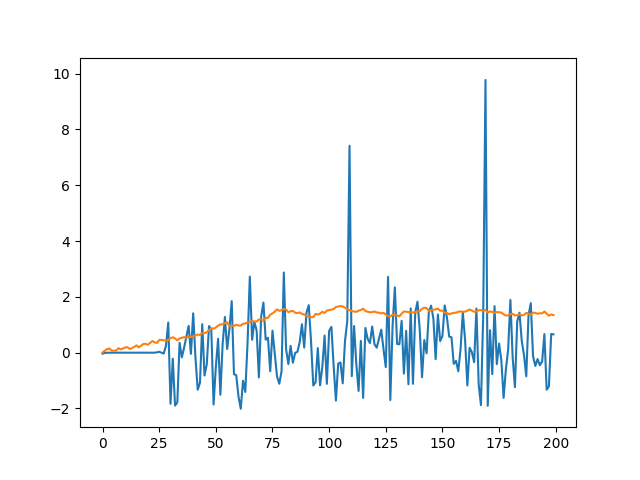

<IPython.core.display.Javascript object>


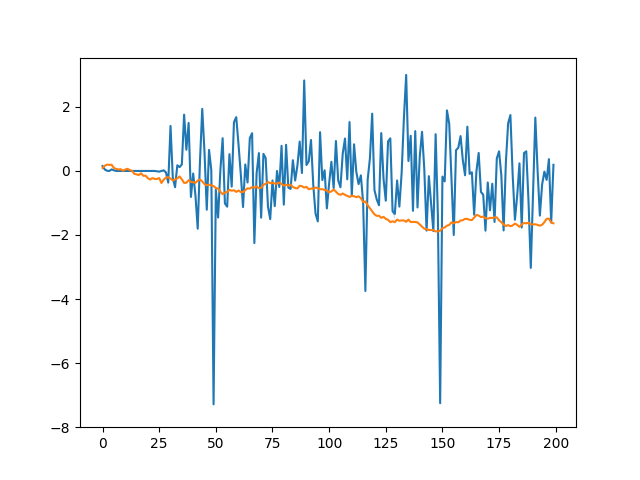

<IPython.core.display.Javascript object>


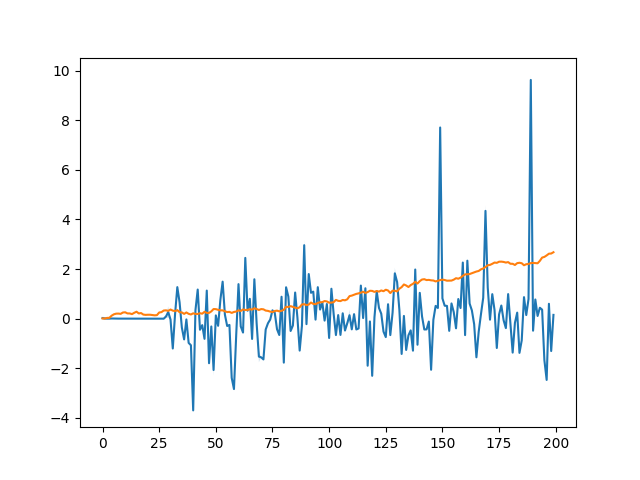

In [3]:
plt.plot(df.index, df['x'])
plt.fill_between(df.index, df['x+'], df['x-'], alpha=0.2)
plt.plot(df.index, df['gnd_x'])

plt.figure()

plt.plot(df.index, df['y'])
plt.fill_between(df.index, df['y+'], df['y-'], alpha=0.2)
plt.plot(df.index, df['gnd_y'])


plt.figure()
plt.plot(df.index, df['z'])
plt.fill_between(df.index, df['z+'], df['z-'], alpha=0.2)
plt.plot(df.index, df['gnd_z'])

plt.show()


<IPython.core.display.Javascript object>


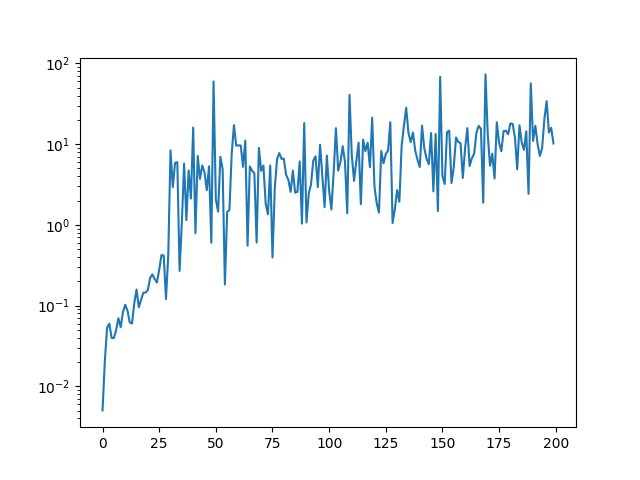

In [4]:
se = (df["x"]-df["gnd_x"])**2 + (df["y"]-df["gnd_y"])**2 + (df["z"]-df["gnd_z"])**2
mse = sum(se)

plt.figure()
plt.yscale("log")
plt.plot(df.index, se)
plt.show()

<IPython.core.display.Javascript object>


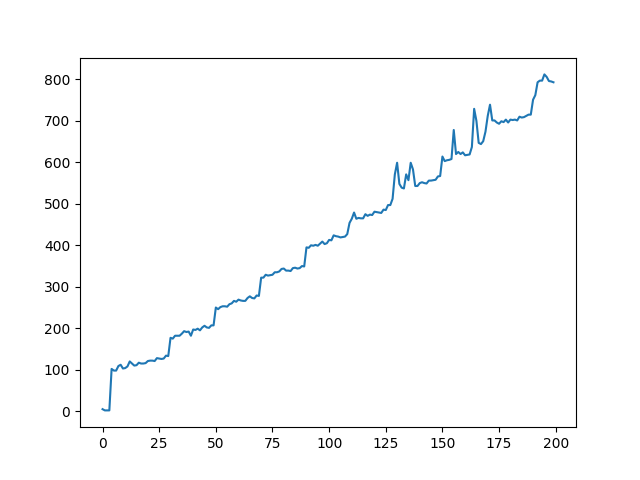

In [5]:
plt.figure()
plt.plot(df.index, df['time'])
plt.show()

In [6]:
anchors = pd.read_csv(prefix+"anchors.csv")
anchors.columns = ['x','y','z']
anchors.head()


,x,y,z
0,-0.487863,-4.347270,2.737160
1,-4.300760,0.133078,2.979340
2,0.134424,-2.106550,1.850130
3,0.802798,8.498710,1.486880
4,4.083850,3.133630,-0.511368


<IPython.core.display.Javascript object>


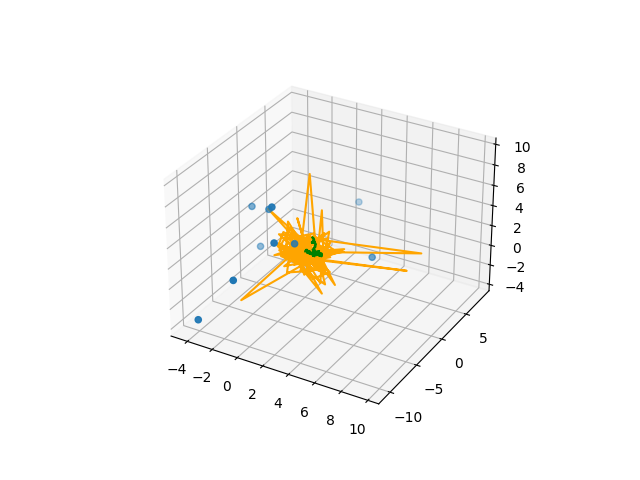

In [7]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(anchors['x'], anchors['y'], anchors['z'])
ax.plot(df['x'],df['y'],df['z'], c="orange")
ax.plot(df['gnd_x'],df['gnd_y'],df['gnd_z'], c="green")

